## Python statistics essential training - 04_05_pvaluesandconfidence

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [10]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [18]:
def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n)<brown, 'brown', 'green')})

In [26]:
dist = pd.DataFrame({'Brown': [sample(0.50,1000).vote.value_counts(normalize=True)['brown'] for i in range(10000)]})

In [27]:
dist.head()

,Brown
0,0.516
1,0.502
2,0.488
3,0.505
4,0.478


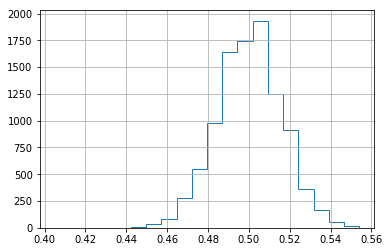

In [30]:
dist.Brown.hist(histtype='step', bins=20)

In [32]:
100 - scipy.stats.percentileofscore(dist.Brown, 0.511)

#not over 50% cannot reject the null hypothesis

24.349999999999994

In [34]:
largepoll = pd.read_csv('poll-larger.csv')

In [35]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [43]:
dist2 = pd.DataFrame({'Green':[sample(0.50,10000).vote.value_counts(normalize=True)['green'] for i in range(1000)]})

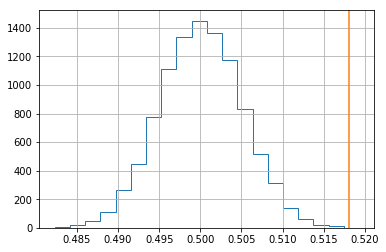

In [42]:
dist2.Green.hist(histtype='step', bins=20)
pp.axvline(0.5181, color='C1')